In [43]:
import pandas as pd
import numpy as np

In [41]:
df=pd.read_csv("new_fmri_data_featurereduction.csv",index_col=False)
df.head()

,41473,64697,91906,10222,7799,46736,23913,62659,34306,3778,...,12040,14615,58386,83744,68616,9263,8890,40924,20174,77252
0,3.39970,-1.24370,-1.1416,1.02480,2.52490,-1.7598,0.92899,-2.2413,1.52230,-1.423600,...,5.32370,2.31570,3.8395,3.861800,-0.96804,3.79090,8.9279,1.60750,0.57323,0.90678
1,-1.45120,-3.32370,1.6569,2.17590,0.91046,-2.2282,2.20200,3.0456,-0.13857,-0.007663,...,-0.30437,1.18060,9.3697,-0.471650,-2.05860,1.80370,2.4596,0.62884,0.60520,-1.21600
2,-0.65157,-3.46600,-2.9327,0.92949,-0.85274,2.5701,-0.33871,4.9387,2.74660,-1.571300,...,5.75520,-3.18780,5.9823,-0.057607,-1.67200,-1.08920,1.9342,0.38761,-0.16916,-0.50361
3,-1.86690,0.15505,0.9562,-1.45740,-3.04840,-1.6663,3.13450,9.4721,-0.82858,-2.294000,...,8.64410,2.63070,4.5789,-1.221200,-2.15350,0.16662,1.3194,0.62833,-0.92445,4.69580
4,2.82090,-0.89856,-1.4202,1.14850,-5.34180,1.6604,3.62530,2.5027,-0.83088,-0.528480,...,4.29710,0.07202,2.6959,0.587080,-4.73660,-0.63257,3.5219,1.66760,-2.96740,-0.96372


In [27]:
#label=pd.read_csv("example1Blabels-04847.csv",index_col=False)

In [34]:
label=[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2]

In [35]:
##data= df.transpose()
#data=data.transpose()
#df['label']=label

In [47]:

# split X and y into training and testing sets
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df,label,test_size=0.20,random_state=0)


In [48]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [50]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[4, 1],
       [0, 5]], dtype=int64)

In [51]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 257.44, 'Predicted label')

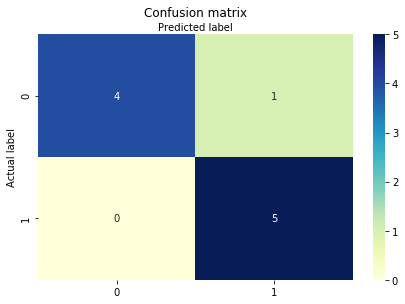

In [57]:
class_names=[1,2] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [53]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9
Precision: 1.0
Recall: 0.8
